In [1]:
import os
import sys
os.environ["THEANO_FLAGS"] = "device=gpu"
sys.path.append(os.getcwd()+"/..")
from tasks import check

Using gpu device 0: Tesla K20Xm (CNMeM is disabled, CuDNN 3007)
/home/mcherti/build/Theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


/home/mcherti/work/code/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.19.
  "This module will be removed in 0.19.", DeprecationWarning)


In [33]:
v = check(what="notebook", 
          filename="../training/49fonts64x64/model.pkl", 
          dataset="fonts",
          force_w=64, force_h=64)
          #kw_load_data={"mode": "random"})

Loading data...


INFO:tasks:Loading data...


Loading the model...


INFO:tasks:Loading the model...


(None, 1, 64, 64)
Compiling the model...


INFO:tasks:Compiling the model...


In [34]:
capsule, data, layers, w, h, c = v
print(w, h, c)
print(layers.keys())
#print(w, h, c)
#print(data.X.min(), data.X.max())

(64, 64, 1)
['input', 'hid1', 'pre_output', 'output']


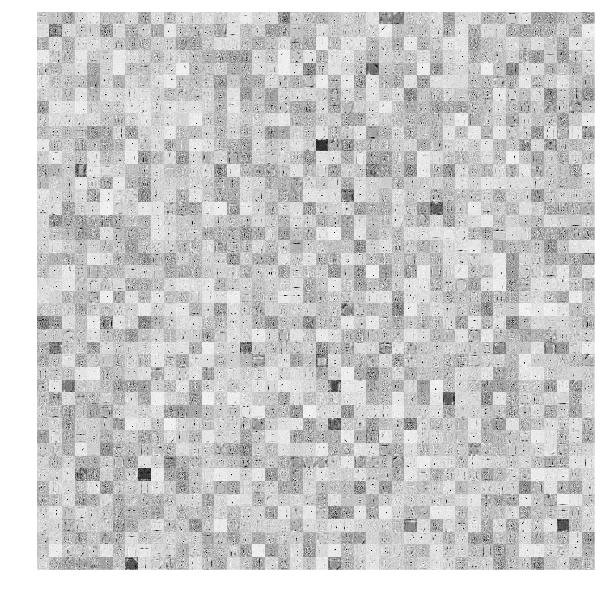

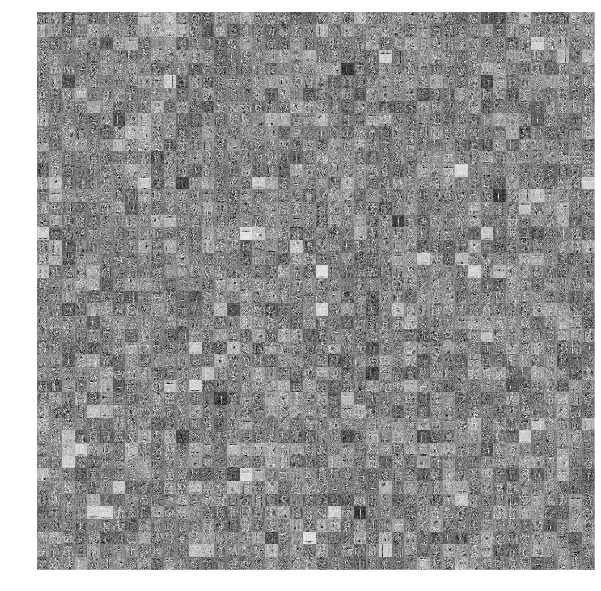

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from lasagnekit.misc.plot_weights import tile_raster_images
import numpy as np
for name, layer in layers.items():
    #print(name, layer.output_shape)
    #if hasattr(layer, "W"):
    #    print(layer.W.get_value().shape)
    if hasattr(layer, "W"):
        W = layer.W.get_value()
        if len(W.shape)==2:
            nbpixels = c*w*h
            if W.shape[0] == nbpixels:
                W = W.T
            a, b = w, h
        else:
            W = W.reshape((W.shape[0]*W.shape[1], W.shape[2], W.shape[3]))
            a, b = W.shape[1:]
        fig = plt.figure(figsize=(10, 10))
        s = int(np.sqrt(W.shape[0]))
        plt.axis('off')
        img=tile_raster_images(W, (a, b), (s, s))
        plt.imshow(img, cmap="gray", interpolation='none')
        plt.show()

In [54]:
from skimage.filters import threshold_otsu
np.random.seed(12345)
T = [0.5, 0.7, 0.8, 0.85, 0.87, 0.89, 0.9, 0.91, 0.92]
def binarize(X):
    for i in range(X.shape[0]):
        X[i] = X[i] >= threshold_otsu(X[i])
    return X
s = np.random.uniform(size=(100, c, w,h ))
s = d
#s = s > 0.2
#s = s > 0.7
s = s.astype(np.float32)
loss = []
for i in range(200):
    sprev = s
    #s *= np.random.uniform(size=s.shape)<=0.9999
    s = capsule.reconstruct(s)
    s = s  > (1-0.2)
    s = s.astype(np.float32)
    score = np.abs(s - sprev).sum()
    print(score)
    loss.append(score)
    if score == 0:
        break
    loss.append(score)


204492.0
46631.0
36265.0
19317.0
9494.0
10807.0
10643.0
8719.0
6108.0
4796.0
3786.0
2764.0
1701.0
1019.0
675.0
512.0
499.0
525.0
730.0
777.0
714.0
431.0
347.0
177.0
178.0
104.0
61.0
68.0
107.0
70.0
46.0
24.0
12.0
1.0
0.0


('Nb of iterations', 69)
float32


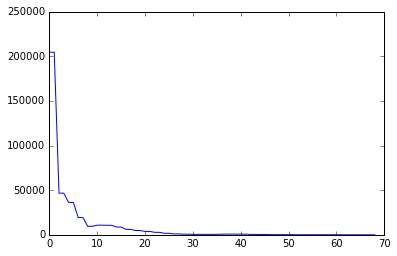

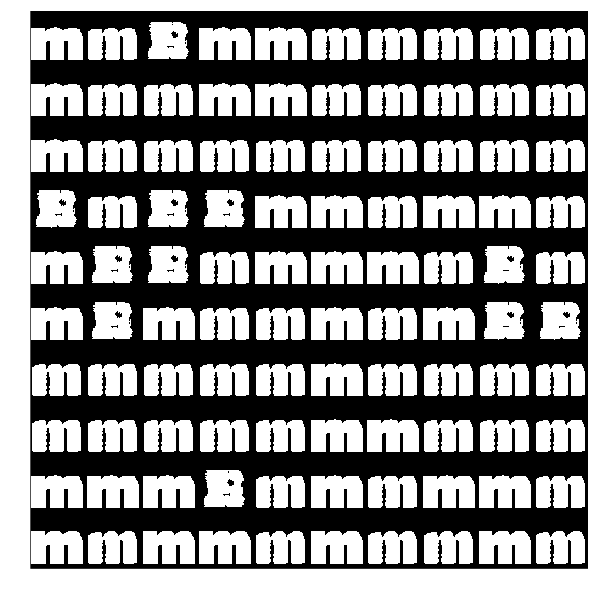

'\nimport hashlib\nfrom collections import Counter\ndef hash_binary_vector(x):\n    m = hashlib.md5()\n    ss = str(x.flatten().tolist())\n    m.update(ss)\n    return m.hexdigest()\ndef hash_matrix(X):\n    hashes = []\n    for i in range(X.shape[0]):\n        h = hash_binary_vector(X[i])\n        hashes.append(h)\n    return hashes\ncnt = Counter(hash_matrix(s))\nprint(len(cnt))\nprint(s.shape)\nV = sorted(cnt.values(), reverse=True)\nplt.bar(np.arange(len(V)), V)\nplt.ylabel("frequency")\nplt.xlabel("fixed point")\nplt.legend()\nplt.xlim((0, len(cnt)))\n#plt.title("Frequency of fixed points")\n'

In [55]:
from lasagnekit.misc.plot_weights import dispims_color

s = s.astype(np.float32)
plt.plot(loss)
print("Nb of iterations", len(loss))
sz = int(np.sqrt(s.shape[0]))
fig = plt.figure(figsize=(10, 10))


if s.shape[1] == 1:
    print(s.dtype)
    img = tile_raster_images(s[:, 0], (w, h), (sz, sz), tile_spacing=(2, 2), )
    plt.imshow(img, cmap="gray", interpolation='none')
    plt.axis('off')
    plt.show()
else:
    ss = s.transpose((0, 2, 3, 1))
    print(s.shape)
    img = dispims_color(ss)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

"""
import hashlib
from collections import Counter
def hash_binary_vector(x):
    m = hashlib.md5()
    ss = str(x.flatten().tolist())
    m.update(ss)
    return m.hexdigest()
def hash_matrix(X):
    hashes = []
    for i in range(X.shape[0]):
        h = hash_binary_vector(X[i])
        hashes.append(h)
    return hashes
cnt = Counter(hash_matrix(s))
print(len(cnt))
print(s.shape)
V = sorted(cnt.values(), reverse=True)
plt.bar(np.arange(len(V)), V)
plt.ylabel("frequency")
plt.xlabel("fixed point")
plt.legend()
plt.xlim((0, len(cnt)))
#plt.title("Frequency of fixed points")
"""